# Transfer matrix approach to unitary optimization

Created 23/05/2024

Objectives:

* Investigate the degeneracy of the resulting transfer matrix from the symmetry operation. Is this approximated as a projector? Of rank one, or higher?
    * There is also a corresponding projector from the boundary given by the canonical MPS form.
* For a given unitary contracted with the bra and ket MPS at a single site, have a resulting transfer matrix. Can we say anything about the operator norm of the resulting transfer matrix? Surely bounded above by one, is it ever smaller?
* What can we say about the unitary transfer matrix applied to the image of the symmetry transfer matrix?
* Away from the boundaries, is the system approximately translationally invariant?
* Each of these should be tested for a number of different states and symmetry operations.

# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import h5py
from tenpy.tools import hdf5_io
import tenpy
import tenpy.linalg.np_conserved as npc

import os

In [3]:
from collections import Counter
from functools import reduce

In [4]:
from spt_classification import (
    get_transfer_matrix_from_unitary,
    get_transfer_matrices_from_unitary_list,
    multiply_transfer_matrices,
    to_npc_array
)

# Load data

In [5]:
DATA_DIR = r"data/transverse_cluster_200_site_dmrg"

In [6]:
loaded_data = list()

for local_file_name in os.listdir(DATA_DIR):
    f_name = r"{}/{}".format(DATA_DIR, local_file_name, ignore_unknown=False)
    with h5py.File(f_name, 'r') as f:
        data = hdf5_io.load_from_hdf5(f)
        loaded_data.append(data)

In [7]:
b_parameters = sorted(list(d['paramters']['B'] for d in loaded_data))

In [8]:
psi_dict = dict()

In [9]:
for b in b_parameters:
    psi = next(
        d['wavefunction']
        for d in loaded_data
        if d['paramters']['B'] == b
    )

    rounded_b = round(b, 1)
    psi_dict[rounded_b] = psi

In [10]:
list(psi_dict)

[0.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0]

In [11]:
test_psi = psi_dict[0.5]

# Code
## Transfer matrix of symmetry operation

In [12]:
np_I = np.array([[1,0],[0,1]])
np_X = np.array([[0,1],[1,0]])
np_Y = np.array([[0,-1j],[1j,0]])
np_Z = np.array([[1,0],[0,-1]])

In [13]:
tms = get_transfer_matrices_from_unitary_list(test_psi, [np_X, np_I], (test_psi.L)//2)

In [14]:
tm = (
    multiply_transfer_matrices(*tms)
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .replace_labels(['(vL.vL*)', '(vR.vR*)'], ['L', 'R'])
    .to_ndarray()
)

In [15]:
tm

array([[ 5.26907589e-01+0.j,  2.23094656e-01+0.j, -1.57412201e-03+0.j,
        ..., -1.77342809e-06+0.j,  1.35644097e-08+0.j,
         2.68362169e-08+0.j],
       [ 1.60085762e-01+0.j,  2.61384204e-01+0.j, -1.63164790e-03+0.j,
        ...,  1.50702397e-06+0.j,  1.48148523e-08+0.j,
         1.85928813e-08+0.j],
       [-5.02432737e-02+0.j, -9.84046922e-02+0.j, -2.26684739e-02+0.j,
        ...,  1.16713551e-05+0.j,  2.28729564e-07+0.j,
         2.42019616e-07+0.j],
       ...,
       [-2.16590823e-02+0.j, -5.05036876e-03+0.j,  1.45148049e-02+0.j,
        ..., -2.42622202e-03+0.j,  3.09828177e-05+0.j,
         8.83826176e-05+0.j],
       [ 9.44375298e-02+0.j, -2.52504727e-02+0.j, -1.22500086e-02+0.j,
        ..., -2.74386294e-03+0.j, -1.33874206e-04+0.j,
         5.99995152e-04+0.j],
       [ 2.45902063e-01+0.j,  2.07626121e-01+0.j, -1.02922464e-01+0.j,
        ..., -6.93143497e-03+0.j,  6.11157757e-04+0.j,
         2.20045109e-03+0.j]])

In [16]:
eig_vals, eig_vecs = np.linalg.eig(tm)

In [17]:
eig_vals

array([ 9.91391477e-01+3.38693677e-19j,  2.14723339e-01-2.94077889e-18j,
       -1.03061521e-01+1.87691077e-02j, -1.03061521e-01-1.87691077e-02j,
        4.22877504e-02+8.08284812e-02j,  4.22877504e-02-8.08284812e-02j,
        2.17317009e-01+4.12208963e-18j, -1.35260188e-01+1.53591789e-17j,
        2.37532352e-02+7.87675690e-02j,  2.37532352e-02-7.87675690e-02j,
       -7.29984029e-02-1.31891148e-17j,  3.10695426e-02+0.00000000e+00j,
        4.23273783e-03-3.00681894e-02j,  4.23273783e-03+3.00681894e-02j,
       -2.62308946e-02+2.61134306e-18j, -3.32415751e-02+1.39515828e-17j,
       -9.41268775e-04-2.18540779e-02j, -9.41268775e-04+2.18540779e-02j,
        1.92076531e-02-9.55712521e-18j, -1.78648961e-02-4.69159819e-03j,
       -1.78648961e-02+4.69159819e-03j,  4.76110481e-03-2.18770349e-02j,
        4.76110481e-03+2.18770349e-02j, -2.25906183e-02-6.55429000e-18j,
        2.03670237e-02-9.24149244e-18j,  1.45719415e-02+8.57954884e-19j,
       -1.37407841e-02+1.01007528e-02j, -1.37407841

In [18]:
np.abs(eig_vals)

array([9.91391477e-01, 2.14723339e-01, 1.04756654e-01, 1.04756654e-01,
       9.12222407e-02, 9.12222407e-02, 2.17317009e-01, 1.35260188e-01,
       8.22711743e-02, 8.22711743e-02, 7.29984029e-02, 3.10695426e-02,
       3.03646518e-02, 3.03646518e-02, 2.62308946e-02, 3.32415751e-02,
       2.18743390e-02, 2.18743390e-02, 1.92076531e-02, 1.84706688e-02,
       1.84706688e-02, 2.23891218e-02, 2.23891218e-02, 2.25906183e-02,
       2.03670237e-02, 1.45719415e-02, 1.70538663e-02, 1.70538663e-02,
       1.07171422e-02, 1.07171422e-02, 8.73676778e-03, 1.16634571e-02,
       1.04576326e-02, 1.04576326e-02, 9.05419293e-03, 5.65172838e-03,
       3.92656317e-03, 4.64033066e-03, 4.18389092e-03, 3.92656317e-03,
       4.18389092e-03, 3.09714645e-03, 3.36489754e-03, 4.44249163e-03,
       3.68189119e-03, 3.60895083e-03, 1.38047394e-03, 1.48087851e-03,
       1.89280056e-03, 1.48087851e-03, 1.13151676e-03, 1.13151676e-03,
       2.64188568e-03, 7.48997301e-05, 2.86695607e-04, 6.99972272e-04,
      

So yes, well approximated as a rank 1 projector.

In [19]:
symmetry_projected_state = eig_vecs[:, 0]

In [20]:
np.linalg.norm(symmetry_projected_state)

1.0

### Multisite
If we operate the symmetry on many sites, will it tends towards this rank one projector with the same eigenvector?

In [21]:
tms = get_transfer_matrices_from_unitary_list(test_psi, [np_X, np_I]*30, ((test_psi.L)//2) - 30)

In [22]:
tm = (
    reduce(multiply_transfer_matrices, tms)
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .replace_labels(['(vL.vL*)', '(vR.vR*)'], ['L', 'R'])
    .to_ndarray()
)

In [23]:
tm

array([[ 7.33924664e-04+0.j, -2.36803851e-06+0.j, -7.64594539e-16+0.j,
        ..., -2.12329226e-18+0.j, -5.19782214e-12+0.j,
         7.56773783e-11+0.j],
       [-4.99675525e-01+0.j,  1.61222391e-03+0.j,  7.94539033e-16+0.j,
        ..., -3.62173160e-18+0.j,  3.53881624e-09+0.j,
        -5.15231820e-08+0.j],
       [ 1.34459262e-11+0.j,  9.16491587e-12+0.j, -5.77418078e-15+0.j,
        ...,  2.95425824e-18+0.j, -9.65362828e-19+0.j,
        -8.85303492e-19+0.j],
       ...,
       [-9.85088951e-12+0.j, -7.70417883e-12+0.j,  5.55750203e-15+0.j,
        ..., -5.02395892e-19+0.j,  7.81625381e-19+0.j,
         1.42589867e-18+0.j],
       [-4.68839407e-01+0.j,  1.51272989e-03+0.j, -8.74243071e-16+0.j,
        ...,  3.27732039e-18+0.j,  3.32042780e-09+0.j,
        -4.83435688e-08+0.j],
       [-1.72817185e-01+0.j,  5.57601851e-04+0.j,  7.50426157e-16+0.j,
        ...,  2.06209321e-18+0.j,  1.22393079e-09+0.j,
        -1.78197467e-08+0.j]])

In [24]:
eig_vals, eig_vecs = np.linalg.eig(tm)

In [25]:
eig_vals

array([ 4.69133143e-03-3.32527057e-71j,  5.54726984e-12+3.32527057e-71j,
       -5.57852759e-12+0.00000000e+00j, -3.46597706e-19-3.95995736e-40j,
       -1.47984516e-19-2.28298821e-39j, -1.53402697e-20+1.73125652e-37j,
       -2.98411235e-21+4.10852633e-21j, -2.98411235e-21-4.10852633e-21j,
        3.61487582e-21+1.07421561e-21j,  3.61487582e-21-1.07421561e-21j,
       -1.69844103e-21+7.25315396e-22j, -1.69844103e-21-7.25315396e-22j,
       -9.15248658e-23+1.47197510e-21j, -9.15248658e-23-1.47197510e-21j,
        1.44312379e-21-4.04863021e-38j, -7.97174066e-22+6.62991529e-22j,
       -7.97174066e-22-6.62991529e-22j,  7.56983756e-22-4.60912741e-38j,
       -2.11430914e-22+2.37294155e-22j, -2.11430914e-22-2.37294155e-22j,
        3.96241709e-22+2.72337915e-38j,  3.32925868e-22-2.16167690e-37j,
       -2.28806521e-23+1.11089263e-22j, -2.28806521e-23-1.11089263e-22j,
       -6.71817285e-23+2.59478434e-39j,  3.55604297e-23+9.90196043e-40j,
       -3.19214690e-24+6.91133604e-24j, -3.19214690

In [26]:
np.abs(eig_vals)

array([4.69133143e-03, 5.54726984e-12, 5.57852759e-12, 3.46597706e-19,
       1.47984516e-19, 1.53402697e-20, 5.07788491e-21, 5.07788491e-21,
       3.77110943e-21, 3.77110943e-21, 1.84683090e-21, 1.84683090e-21,
       1.47481778e-21, 1.47481778e-21, 1.44312379e-21, 1.03684341e-21,
       1.03684341e-21, 7.56983756e-22, 3.17823139e-22, 3.17823139e-22,
       3.96241709e-22, 3.32925868e-22, 1.13421112e-22, 1.13421112e-22,
       6.71817285e-23, 3.55604297e-23, 7.61290796e-24, 7.61290796e-24,
       2.22503607e-24, 2.84794202e-25, 1.66465675e-27, 8.51619362e-28,
       8.51619362e-28, 1.60506947e-28, 8.04527067e-29, 8.04527067e-29,
       5.54178734e-29, 4.16640229e-29, 1.09388811e-29, 1.09388811e-29,
       4.95606872e-30, 2.36168009e-30, 2.36168009e-30, 1.46385291e-30,
       1.46385291e-30, 9.46013168e-31, 9.46013168e-31, 7.65913559e-31,
       2.80484028e-31, 2.80484028e-31, 2.75313720e-31, 1.93000974e-31,
       1.93000974e-31, 1.47005936e-31, 1.29346047e-31, 5.94187425e-32,
      

Not quite a rank 1 projector, modified by a small scalar.

In [27]:
np.abs(symmetry_projected_state - eig_vecs[:, 0])

array([3.42608264e-01, 2.03290077e-01, 7.04031042e-03, 3.93711409e-04,
       7.50781311e-03, 1.33151310e-02, 3.84478386e-02, 1.38409089e-02,
       2.03290077e-01, 3.41925341e-01, 4.10891065e-03, 1.72890920e-02,
       1.22389416e-03, 8.07323741e-03, 1.38566175e-02, 3.69521750e-02,
       7.04031042e-03, 4.10891065e-03, 3.26355107e-01, 1.19350247e-01,
       7.34383216e-02, 4.37729560e-01, 6.51543255e-03, 4.89252210e-03,
       3.93711409e-04, 1.72890920e-02, 1.19350247e-01, 2.38459709e-01,
       1.54326472e-01, 2.58414425e-01, 1.57544179e-02, 1.93879859e-03,
       7.50781311e-03, 1.22389416e-03, 7.34383216e-02, 1.54326472e-01,
       4.03199013e-02, 3.03156226e-01, 8.83190164e-03, 6.58058724e-03,
       1.33151310e-02, 8.07323741e-03, 4.37729560e-01, 2.58414425e-01,
       3.03156226e-01, 4.76338268e-02, 1.11406742e-03, 1.48355272e-02,
       3.84478386e-02, 1.38566175e-02, 6.51543255e-03, 1.57544179e-02,
       8.83190164e-03, 1.11406742e-03, 1.78551001e-01, 2.42714582e-01,
      

The eigenvector winds up being a bit different too.

In [28]:
symmetry_projected_state = eig_vecs[:, 0]

In [29]:
symmetry_projected_eig_val = eig_vals[0]

In [30]:
symmetry_projected_eig_val

(0.004691331425645306-3.325270566927668e-71j)

In [31]:
np.linalg.norm(symmetry_projected_state)

0.9999999999999999

In [32]:
np.linalg.svd(tm).S

array([1.99871487e+00, 5.88672656e-11, 5.88672487e-11, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
      

One singular value close to 2, the others almost vanishing...

The state is almost purely real.

In [33]:
symmetry_projected_state - symmetry_projected_state.conj()

array([0.+3.40570880e-71j, 0.+0.00000000e+00j, 0.+1.30782116e-88j,
       0.+1.09026553e-88j, 0.-1.89135438e-91j, 0.-9.85597771e-91j,
       0.-3.45734862e-72j, 0.+1.94676471e-71j, 0.+1.02951152e-84j,
       0.-3.42586092e-71j, 0.+3.79592250e-91j, 0.+6.31047984e-91j,
       0.+1.42770589e-88j, 0.+9.27780987e-89j, 0.-1.94676594e-71j,
       0.-3.45813581e-72j, 0.+1.30782138e-88j, 0.+3.79592162e-91j,
       0.-2.33764628e-70j, 0.+2.01076468e-87j, 0.+2.57377879e-85j,
       0.+1.02951152e-84j, 0.-1.07228864e-88j, 0.-1.97386568e-89j,
       0.+1.09026534e-88j, 0.+6.31047896e-91j, 0.+2.01076468e-87j,
       0.+9.92492062e-72j, 0.+1.02951152e-84j, 0.-2.57377879e-85j,
       0.+1.28823119e-88j, 0.+2.25650836e-89j, 0.-1.89135409e-91j,
       0.+1.42770608e-88j, 0.+2.57377879e-85j, 0.+1.02951152e-84j,
       0.-1.02272025e-71j, 0.+0.00000000e+00j, 0.-1.65310488e-89j,
       0.+9.12962245e-89j, 0.-9.85597757e-91j, 0.+9.27780687e-89j,
       0.+0.00000000e+00j, 0.+0.00000000e+00j, 0.-4.02152937e-

But single eigenvector approximation is not as good as expected...

In [34]:
np.linalg.norm(tm - symmetry_projected_eig_val*np.outer(symmetry_projected_state, symmetry_projected_state.conj()))

1.9987093616693288

In [35]:
np.linalg.svd(np.outer(symmetry_projected_state, symmetry_projected_state)).S

array([1.00000000e+00, 9.99200587e-17, 9.99200587e-17, 9.99200587e-17,
       9.99200587e-17, 9.99200587e-17, 9.99200587e-17, 9.99200587e-17,
       9.99200587e-17, 9.99200587e-17, 9.99200587e-17, 9.99200587e-17,
       9.99200587e-17, 9.99200587e-17, 9.99200587e-17, 9.99200587e-17,
       9.99200587e-17, 9.99200587e-17, 9.99200587e-17, 9.99200587e-17,
       9.99200587e-17, 9.99200587e-17, 9.99200587e-17, 9.99200587e-17,
       9.99200587e-17, 9.99200587e-17, 9.99200587e-17, 9.99200587e-17,
       9.99200587e-17, 9.99200587e-17, 9.99200587e-17, 9.99200587e-17,
       9.99200587e-17, 9.99200587e-17, 9.99200587e-17, 9.99200587e-17,
       9.99200587e-17, 9.99200587e-17, 9.99200587e-17, 9.99200587e-17,
       9.99200587e-17, 9.99200587e-17, 9.99200587e-17, 9.99200587e-17,
       9.99200587e-17, 9.99200587e-17, 9.99200587e-17, 9.99200587e-17,
       9.99200587e-17, 9.99200587e-17, 9.99200587e-17, 9.99200587e-17,
       9.99200587e-17, 9.99200587e-17, 9.99200587e-17, 9.99200587e-17,
      

In [36]:
np.linalg.norm(np.linalg.eig(np.outer(symmetry_projected_state, symmetry_projected_state.conj()))[1][0] - symmetry_projected_state)

1.9836374287493117

Could use the SVD decomposition instead? I'm not sure there is any reason not to, offers more flexibility to get the best approximation, as the input and output vectors are allowed to be different. (The eigenvector description is useful for translationally invariant systems, as it can then be calculated directly from the transfer matrix.)

In [37]:
U, S, Vh = np.linalg.svd(tm)

In [38]:
S

array([1.99871487e+00, 5.88672656e-11, 5.88672487e-11, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
      

In [39]:
left_projected_symmetry_state = U[:,0]
right_projected_symmetry_state = Vh[0].conj()

In [40]:
svd_tm_approx = S[0]*(np.outer(left_projected_symmetry_state, right_projected_symmetry_state.conj()))

In [41]:
np.linalg.norm(tm - svd_tm_approx)

8.325087716580306e-11

Much better. But why is there such a discrepancy between the eigenvector and SVD decompositions?

In [42]:
S[0]

1.9987148673623165

Singular value very close to 2... why?

## Transfer matrix of one site unitary
Note that after multiplying on the symmetry projected state, the output vector is linearly dependent on the input unitary.

In [43]:
index = ((test_psi.L)//2) + 30

Evaluate matrix for each of the four pauli matrices. Output is then a linear combination.
Also want the operator norm, (i.e. largest singular value) which we can't expect to behave linearly.

### Check matrix product assumptions

In [44]:
tm1 = (
    get_transfer_matrix_from_unitary(test_psi, np_I, index)
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
)

In [45]:
tm2 = (
    get_transfer_matrix_from_unitary(test_psi, np_I, index+1)
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
)

In [46]:
tm1

<npc.Array shape=(64, 64) labels=['(vL.vL*)', '(vR.vR*)']>

In [47]:
tm12 = tenpy.linalg.np_conserved.tensordot(tm1, tm2, ('(vR.vR*)', '(vL.vL*)'))

In [48]:
np_tm1 = tm1.to_ndarray()
np_tm2 = tm2.to_ndarray()

In [49]:
np_tm12 = np_tm1 @ np_tm2

In [50]:
np.linalg.norm(np_tm12 - tm12.to_ndarray())

0.0

As expected.

In [51]:
unitaries = [np_I, np_X, np_Y, np_Z]

In [52]:
one_site_tms = [
    get_transfer_matrix_from_unitary(test_psi, u, index)
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .to_ndarray()
    for u in unitaries
]

In [53]:
X1 = one_site_tms[0]

In [54]:
X2 = (
    get_transfer_matrix_from_unitary(test_psi, np_I, index+1)
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .to_ndarray()
)

In [55]:
X1[0,0] == X2[0,0]

False

In [56]:
singular_values = [
    np.linalg.svd(tm).S
    for tm in one_site_tms
]

In [57]:
singular_values[0]

array([1.38999682, 1.38999682, 1.38999682, 1.38999682, 1.38999682,
       1.38999682, 1.38999682, 1.38999682, 1.38999682, 1.38999682,
       1.38999682, 1.38999682, 1.38999682, 1.38999682, 1.38999682,
       1.38999682, 0.25865202, 0.25865202, 0.25865202, 0.25865202,
       0.25865202, 0.25865202, 0.25865202, 0.25865202, 0.25865202,
       0.25865202, 0.25865202, 0.25865202, 0.25865202, 0.25865202,
       0.25865202, 0.25865202, 0.03345043, 0.03345043, 0.03345043,
       0.03345043, 0.03345043, 0.03345043, 0.03345043, 0.03345043,
       0.03345043, 0.03345043, 0.03345043, 0.03345043, 0.03345043,
       0.03345043, 0.03345043, 0.03345043, 0.00622449, 0.00622449,
       0.00622449, 0.00622449, 0.00622449, 0.00622449, 0.00622449,
       0.00622449, 0.00622449, 0.00622449, 0.00622449, 0.00622449,
       0.00622449, 0.00622449, 0.00622449, 0.00622449])

In [58]:
singular_values_counts = [
    Counter(np.round(sv, 3))
    for sv in singular_values
]

In [59]:
singular_values_counts

[Counter({1.39: 16, 0.259: 16, 0.033: 16, 0.006: 16}),
 Counter({1.39: 16, 0.259: 16, 0.033: 16, 0.006: 16}),
 Counter({0.0: 32, 1.39: 16, 0.261: 16}),
 Counter({0.0: 32, 1.39: 16, 0.261: 16})]

No clear reason/explanation for the 1.3899 singular value...

Check singular values of $M-I$, the bound on the "update".

In [60]:
singular_values = [
    np.linalg.svd(tm - np.identity(tm.shape[0])).S
    for tm in one_site_tms
]

In [61]:
singular_values[0]

array([2.27187424e+00, 2.26676778e+00, 2.25519399e+00, 2.25136926e+00,
       2.10154751e+00, 2.02148522e+00, 2.01851511e+00, 1.92011661e+00,
       1.91320075e+00, 1.82588387e+00, 1.82486731e+00, 1.67922482e+00,
       1.49483711e+00, 1.49424566e+00, 1.42108433e+00, 1.40139869e+00,
       1.25617906e+00, 1.25571262e+00, 1.17368124e+00, 1.11249718e+00,
       1.11109680e+00, 1.09014464e+00, 1.06851545e+00, 1.05892256e+00,
       1.04721476e+00, 1.04167491e+00, 1.03289766e+00, 1.03203080e+00,
       1.02995759e+00, 1.02862200e+00, 1.01079724e+00, 1.00581672e+00,
       1.00470901e+00, 9.95829489e-01, 9.91056529e-01, 9.86476078e-01,
       9.84889039e-01, 9.77473979e-01, 9.77081828e-01, 9.74017687e-01,
       9.68890942e-01, 9.66548809e-01, 9.65302474e-01, 9.23691303e-01,
       9.20969140e-01, 8.77639774e-01, 8.49295198e-01, 8.07965892e-01,
       7.58586852e-01, 7.57324417e-01, 7.48213518e-01, 7.37310450e-01,
       7.28762719e-01, 5.59077534e-01, 5.56407217e-01, 5.15351012e-01,
      

In [62]:
singular_values_counts = [
    Counter(np.round(sv, 3))
    for sv in singular_values
]

In [63]:
singular_values_counts

[Counter({1.256: 2,
          0.977: 2,
          0.013: 2,
          2.272: 1,
          2.267: 1,
          2.255: 1,
          2.251: 1,
          2.102: 1,
          2.021: 1,
          2.019: 1,
          1.92: 1,
          1.913: 1,
          1.826: 1,
          1.825: 1,
          1.679: 1,
          1.495: 1,
          1.494: 1,
          1.421: 1,
          1.401: 1,
          1.174: 1,
          1.112: 1,
          1.111: 1,
          1.09: 1,
          1.069: 1,
          1.059: 1,
          1.047: 1,
          1.042: 1,
          1.033: 1,
          1.032: 1,
          1.03: 1,
          1.029: 1,
          1.011: 1,
          1.006: 1,
          1.005: 1,
          0.996: 1,
          0.991: 1,
          0.986: 1,
          0.985: 1,
          0.974: 1,
          0.969: 1,
          0.967: 1,
          0.965: 1,
          0.924: 1,
          0.921: 1,
          0.878: 1,
          0.849: 1,
          0.808: 1,
          0.759: 1,
          0.757: 1,
          0.748: 1,
   

Multiply tms against projected state

In [64]:
transfered_once_projected_states = [
    np.matmul(right_projected_symmetry_state.conj(), tm)
    for tm in one_site_tms
]

In [65]:
[np.linalg.norm(v) for v in transfered_once_projected_states]

[0.2598906092402411,
 0.9999999999999993,
 0.9653273577592497,
 0.024494154206292876]

In [66]:
transfered_once_projected_states[0]

array([-1.83008042e-01+0.j, -2.95578737e-04+0.j, -1.41188503e-05+0.j,
        1.40918606e-05+0.j,  5.70681865e-03+0.j, -1.03535209e-02+0.j,
       -2.03510216e-17+0.j,  1.30917512e-17+0.j, -2.95578737e-04+0.j,
        1.83008042e-01+0.j,  1.84352196e-03+0.j,  1.16774902e-02+0.j,
        2.31591213e-05+0.j,  2.61451214e-05+0.j, -1.53915016e-17+0.j,
        3.14522151e-17+0.j, -1.41188503e-05+0.j,  1.84352196e-03+0.j,
       -5.87386256e-05+0.j,  6.04619202e-07+0.j,  2.24091260e-07+0.j,
        2.63520753e-07+0.j, -1.50998383e-07+0.j, -3.75116982e-06+0.j,
        1.40918606e-05+0.j,  1.16774902e-02+0.j,  6.04619202e-07+0.j,
       -5.49956092e-05+0.j, -2.19509965e-07+0.j, -3.71406411e-07+0.j,
        1.31373683e-08+0.j,  5.92616901e-07+0.j,  5.70681865e-03+0.j,
        2.31591213e-05+0.j,  2.24091260e-07+0.j, -2.19509965e-07+0.j,
        5.79178312e-05+0.j,  1.66176913e-06+0.j,  3.32581335e-06+0.j,
       -1.34919907e-07+0.j, -1.03535209e-02+0.j,  2.61451214e-05+0.j,
        2.63520753e-

In [67]:
transfered_twice_projected_states = [
    [
        np.matmul(v, tm) for tm in one_site_tms
    ]
    for v in transfered_once_projected_states
]

In [68]:
[
    [np.linalg.norm(v) for v in l]
    for l in transfered_twice_projected_states
]

[[0.09860577399571531,
  0.2585343569466187,
  0.24159149396594756,
  0.012517795282441912],
 [0.2599364276881363,
  0.9999745906862684,
  0.9653299685327946,
  0.024938391989656566],
 [0.24236243919500525,
  0.964772371288879,
  0.9347197788477917,
  0.022078722171449232],
 [0.006876680489180962,
  0.0028763590990107534,
  0.0025219426526905077,
  0.03373432687342532]]

## Sweep over unitaries
Use the super-fibonacci spirals. Could do an analytic caclulation perhaps?

In [69]:
import math
C1 = math.sqrt(2)
C2 = 1.533751168755204288118041

In [70]:
def super_fibonacci_point(n, s, phi=C1, psi=C2):
    t = s/n
    d = 2*math.pi*s
    r = math.sqrt(t)
    R = math.sqrt(1-t)
    alpha = d/phi
    beta = d/psi
    point = [
        r*math.sin(alpha),
        r*math.cos(alpha),
        R*math.sin(beta),
        R*math.cos(beta)
    ]

    return point

def super_fibonacci(n, phi=C1, psi=C2):
    out = np.zeros((n,4))

    for i in range(n):
        s = i + 0.5
        point = super_fibonacci_point(n, s, phi=C1, psi=C2)
        out[i] = point

    return out

In [71]:
def s3_to_unitary(p):
    X = p[0]*np_I + 1j*(p[1]*np_X + p[2]*np_Y + p[3]*np_Z)
    return X

In [72]:
fib_unitaries = [s3_to_unitary(p) for p in super_fibonacci(1000)]

In [73]:
np.dot(fib_unitaries[500], fib_unitaries[500].T.conj())

array([[1.00000000e+00+0.00000000e+00j, 5.65553453e-18+1.73472348e-17j],
       [5.65553453e-18-1.73472348e-17j, 1.00000000e+00+0.00000000e+00j]])

In [74]:
np.linalg.det(fib_unitaries[500])

(1+5.551115123125783e-17j)

In [75]:
fib_tms = [
    get_transfer_matrix_from_unitary(test_psi, u, index)
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .to_ndarray()
    for u in fib_unitaries
]

In [76]:
def operator_norm(m):
    singular_values = np.linalg.svd(m).S
    singular_values_counts = Counter(np.round(singular_values, 3))

    norm = max(singular_values_counts.keys())
    count = singular_values_counts[norm]

    return (norm, count)

In [77]:
operator_norm(fib_tms[500])

(1.39, 16)

In [78]:
operator_norms = [operator_norm(tm) for tm in fib_tms]

In [79]:
Counter(operator_norms)

Counter({(1.39, 16): 1000})

So the operator norm (and it's degeneracy) seems to be some kind of an invariant? Need to dig into this more.

In [80]:
fib_transfered_once_projected_states = [
    np.matmul(right_projected_symmetry_state.conj(), tm)
    for tm in fib_tms
]

In [81]:
transfered_once_norms = np.array([np.linalg.norm(v) for v in fib_transfered_once_projected_states])

In [82]:
pd.Series(transfered_once_norms).describe()

count    1000.000000
mean        0.673844
std         0.213880
min         0.080190
25%         0.518177
50%         0.705949
75%         0.857338
max         0.997721
dtype: float64

<Axes: ylabel='Count'>

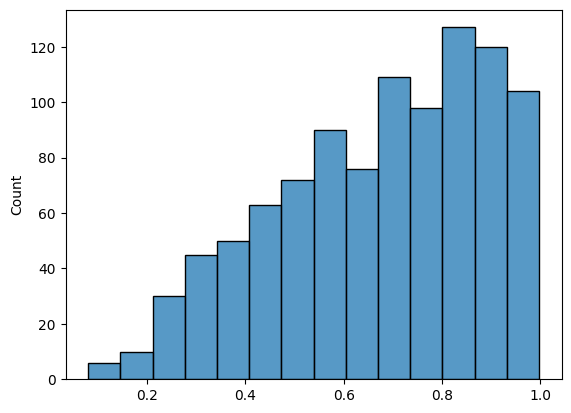

In [83]:
sns.histplot(transfered_once_norms)

In [84]:
fib_tms_1 = [
    get_transfer_matrix_from_unitary(test_psi, u, index+1)
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .to_ndarray()
    for u in fib_unitaries
]

In [85]:
fib_transfered_twice_projected_states = [
    np.matmul(v, tm)
    for v in fib_transfered_once_projected_states
    for tm in fib_tms
]

In [86]:
transfered_twice_norms = np.array([np.linalg.norm(v) for v in fib_transfered_twice_projected_states])

In [87]:
pd.Series(transfered_twice_norms).describe()

count    1000000.000000
mean           0.453715
std            0.209541
min            0.009898
25%            0.285996
50%            0.440534
75%            0.612005
max            0.995300
dtype: float64

<Axes: ylabel='Count'>

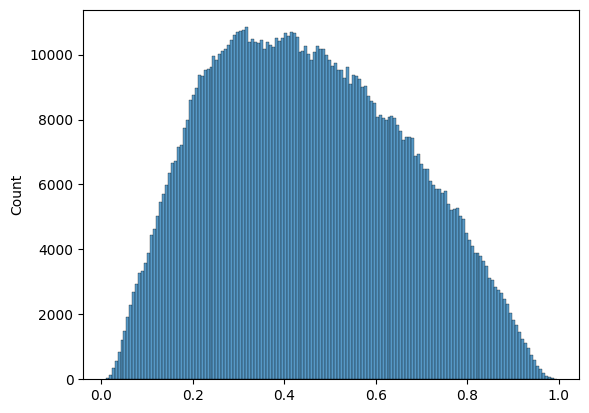

In [88]:
sns.histplot(transfered_twice_norms)

Form the right environment vector.

In [89]:
vR = np.identity(8).reshape((64,))

In [90]:
fib_transfered_twice_inner_products = [
    np.abs(np.dot(v, vR)) for v in fib_transfered_twice_projected_states
]

In [91]:
pd.Series(fib_transfered_twice_inner_products).describe()

count    1.000000e+06
mean     1.315019e-03
std      1.113661e-03
min      5.158361e-07
25%      4.554196e-04
50%      9.880402e-04
75%      1.866744e-03
max      6.539194e-03
dtype: float64

<Axes: ylabel='Count'>

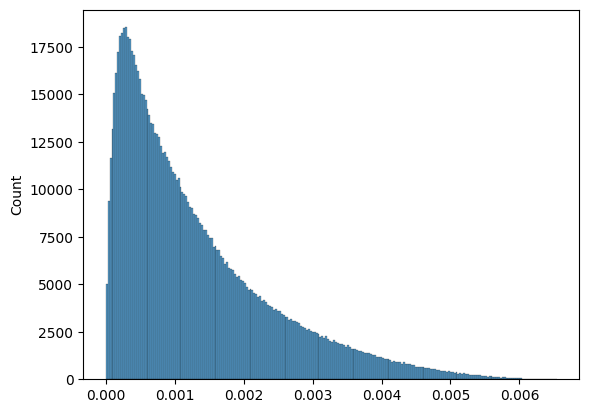

In [92]:
sns.histplot(fib_transfered_twice_inner_products)

## Implement search algorithm
### First step

In [93]:
base_unitaries = np.array([np_I, 1j*np_X, 1j*np_Y, 1j*np_Z])

In [94]:
base_unitaries.shape

(4, 2, 2)

In [95]:
index

130

In [96]:
base_tms = np.array([
    get_transfer_matrix_from_unitary(test_psi, u, index)
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .to_ndarray()
    for u in base_unitaries
])

In [97]:
base_tms.shape

(4, 64, 64)

In [98]:
base_vectors = np.matmul(right_projected_symmetry_state.conj(), base_tms)

In [99]:
base_vectors.shape

(4, 64)

In [100]:
super_fib_points = np.array([p for p in super_fibonacci(1000) if p[0] >= 0])

In [101]:
len(super_fib_points)

503

In [102]:
super_fib_points.shape

(503, 4)

In [103]:
sample_points = np.matmul(super_fib_points, base_vectors)

In [104]:
sample_points.shape

(503, 64)

In [105]:
inner_products = np.matmul(sample_points, vR)

In [106]:
inner_products.shape

(503,)

In [107]:
pd.Series(np.abs(inner_products)).describe()

count    5.030000e+02
mean     4.069730e-11
std      1.759418e-11
min      1.275686e-12
25%      2.796019e-11
50%      3.946762e-11
75%      5.345921e-11
max      7.830460e-11
dtype: float64

In [108]:
dists = np.linalg.norm(sample_points[np.newaxis, :, :] - sample_points[:, np.newaxis, :], axis=2)

In [109]:
dists

array([[0.        , 0.9919521 , 0.09822114, ..., 0.88250178, 0.99372412,
        1.29439041],
       [0.9919521 , 0.        , 1.08170612, ..., 0.34610005, 0.62939794,
        0.93474585],
       [0.09822114, 1.08170612, 0.        , ..., 0.97537336, 1.04626091,
        1.38599984],
       ...,
       [0.88250178, 0.34610005, 0.97537336, ..., 0.        , 0.7317492 ,
        0.77832944],
       [0.99372412, 0.62939794, 1.04626091, ..., 0.7317492 , 0.        ,
        1.49497488],
       [1.29439041, 0.93474585, 1.38599984, ..., 0.77832944, 1.49497488,
        0.        ]])

In [110]:
dists_vec = np.triu(dists).flatten()
dists_vec = dists_vec[dists_vec > 0]

In [111]:
pd.Series(dists_vec).describe()

count    126253.000000
mean          0.896487
std           0.410743
min           0.027169
25%           0.574972
50%           0.880222
75%           1.202690
max           1.972426
dtype: float64

<Axes: ylabel='Count'>

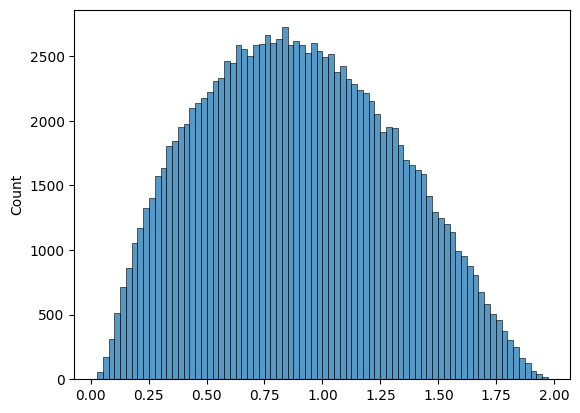

In [112]:
sns.histplot(dists_vec)

### Second step

In [113]:
second_tms = np.array([
    get_transfer_matrix_from_unitary(test_psi, u, index+1)
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .to_ndarray()
    for u in base_unitaries
])

In [114]:
second_tms.shape

(4, 64, 64)

In [115]:
second_vectors = np.matmul(sample_points, base_tms)

In [116]:
second_vectors.shape

(4, 503, 64)

In [117]:
super_fib_points.shape

(503, 4)

In [118]:
second_sample_points = np.tensordot(super_fib_points, second_vectors, [[1,], [0,]])

In [119]:
second_sample_points.shape

(503, 503, 64)

In [120]:
vR.shape

(64,)

In [121]:
second_inner_products = np.dot(second_sample_points, vR).flatten()

In [122]:
second_inner_products.shape

(253009,)

In [123]:
pd.Series(np.abs(second_inner_products)).describe()

count    2.530090e+05
mean     1.326700e-03
std      1.125061e-03
min      5.366142e-07
25%      4.545131e-04
50%      9.972213e-04
75%      1.882976e-03
max      6.492501e-03
dtype: float64

In [124]:
np.percentile(np.abs(second_inner_products), [90, 99, 99.9, 99.99])

array([0.00297775, 0.00485874, 0.00581784, 0.0062891 ])

In [125]:
np.percentile(np.abs(second_inner_products), 99.9)

0.005817843036149485

In [126]:
inner_product_threshold = 0.00577334

In [127]:
second_filtered_points = np.reshape(second_sample_points, (-1, 64))[np.abs(second_inner_products) > inner_product_threshold]

In [128]:
second_filtered_points.shape

(300, 64)

In [129]:
second_dists = np.linalg.norm(second_filtered_points[np.newaxis, :, :] - second_filtered_points[:, np.newaxis, :], axis=2)

In [130]:
second_dists

array([[0.        , 0.24038763, 0.09178719, ..., 0.20920309, 0.40328741,
        0.36774433],
       [0.24038763, 0.        , 0.26225497, ..., 0.22625141, 0.41294007,
        0.29079599],
       [0.09178719, 0.26225497, 0.        , ..., 0.28096323, 0.32084974,
        0.44257779],
       ...,
       [0.20920309, 0.22625141, 0.28096323, ..., 0.        , 0.55487094,
        0.18388014],
       [0.40328741, 0.41294007, 0.32084974, ..., 0.55487094, 0.        ,
        0.68891064],
       [0.36774433, 0.29079599, 0.44257779, ..., 0.18388014, 0.68891064,
        0.        ]])

In [131]:
second_dists_vec = np.triu(second_dists).flatten()
second_dists_vec = second_dists_vec[second_dists_vec > 0]

In [132]:
pd.Series(second_dists_vec).describe()

count    44850.000000
mean         0.302574
std          0.145273
min          0.003528
25%          0.189745
50%          0.282527
75%          0.395621
max          0.859299
dtype: float64

<Axes: ylabel='Count'>

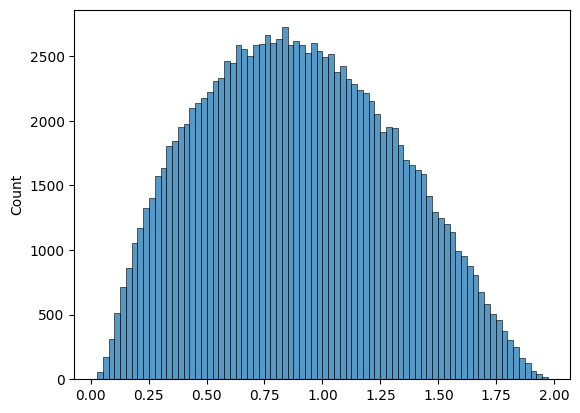

In [133]:
sns.histplot(dists_vec)

### Make into a function

In [134]:
def search_step(previous_points, s3_previous_points, s3_sample_points, num_next_points, index, vR):
    base_tms = np.array([
        get_transfer_matrix_from_unitary(test_psi, u, index)
        .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
        .to_ndarray()
        for u in base_unitaries
    ])

    base_vectors = np.matmul(previous_points, base_tms)
    base_overlaps = np.dot(base_vectors, vR)

    #overlaps = np.abs(np.tensordot(s3_sample_points, base_overlaps, [[1,], [0,]])).flatten()
    overlaps = np.abs(np.tensordot(s3_sample_points, base_overlaps, [[1,], [0,]]))
    target_percentile = 100.0*(1.0 - min(1, num_next_points/(overlaps.size)))
    overlap_threshold = np.percentile(overlaps, target_percentile)

    print(overlap_threshold)

    all_next_points = np.tensordot(s3_sample_points, base_vectors, [[1,], [0,]])

    overlaps_filter = (overlaps > overlap_threshold)
    print(overlaps_filter.shape)
    print(overlaps_filter.sum())
    print(np.var(overlaps))
    

    if s3_previous_points is None:
        assert previous_points.shape[0] == 1
        all_next_s3_points = s3_sample_points[:, np.newaxis, np.newaxis, :]
        next_s3_depth = 1
    else:
        prev_num_s3_points, prev_s3_depth, *_ = s3_previous_points.shape
        next_s3_depth = prev_s3_depth + 1

        num_s3_sample_points = s3_sample_points.shape[0]
        all_next_s3_points = np.zeros((num_s3_sample_points, prev_num_s3_points, next_s3_depth, 4))
        
        all_next_s3_points[:, :, :-1, :] = s3_previous_points[np.newaxis, ...]
        all_next_s3_points[:, :, -1, :] = s3_sample_points[:, np.newaxis, :]
        #all_next_s3_points = all_next_s3_points.reshape((prev_num_s3_points*num_s3_sample_points, prev_s3_depth + 1, 4))

    """
    filtered_next_s3_points = np.reshape(all_next_s3_points[overlaps_filter], (-1, next_s3_depth, 4))
    filtered_next_points = np.reshape(all_next_points[overlaps_filter], (-1, 64))
    filtered_overlaps = overlaps[overlaps_filter].flatten()
    """
    
    filtered_next_s3_points = all_next_s3_points[overlaps_filter]
    filtered_next_points = all_next_points[overlaps_filter]
    filtered_overlaps = overlaps[overlaps_filter]

    return (filtered_next_points, filtered_next_s3_points, filtered_overlaps)

In [135]:
a = np.arange(10).reshape((2,5))

In [136]:
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [137]:
a > 2

array([[False, False, False,  True,  True],
       [ True,  True,  True,  True,  True]])

In [138]:
a[a>-1]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [139]:
index = (test_psi.L)//2 + 30

In [140]:
N = 10000

In [141]:
# s3_points_0 = np.zeros((0,0,4))

In [411]:
points_1, s3_points_1, overlaps_1 = search_step(
    right_projected_symmetry_state[np.newaxis, :],
    None,
    super_fib_points,
    N,
    (test_psi.L)//2 + 30,
    vR
)

1.275683795438508e-12
(503, 1)
502
3.0893929246038747e-22


In [412]:
np.max(overlaps_1)

7.830454947183468e-11

In [413]:
points_1.shape

(502, 64)

In [414]:
s3_points_1.shape

(502, 1, 4)

In [146]:
#dists_3 = all_to_all_distances(points_3)

In [147]:
#pd.Series(dists_3).describe()

In [415]:
super_fib_points.shape

(503, 4)

In [416]:
points_2, s3_points_2, overlap_2 = search_step(points_1, s3_points_1, super_fib_points, N, (test_psi.L)//2 + 30+1, vR)

0.7985486980277029
(503, 502)
10000
0.055324575755854824


In [417]:
np.max(overlap_2)

1.3385384571321608

In [418]:
points_2.shape

(10000, 64)

In [419]:
s3_points_2.shape

(10000, 2, 4)

In [153]:
# dists_2 = all_to_all_distances(points_2)

In [154]:
# pd.Series(dists_2).describe()

In [155]:
# sns.histplot(dists_2)

In [420]:
points_3, s3_points_3, overlaps_3 = search_step(points_2, s3_points_2, super_fib_points, N, (test_psi.L)//2 + 30 +2, vR)

1.0998994245267626
(503, 10000)
10000
0.053109959349186144


In [421]:
np.max(overlaps_3)

1.322568351285101

In [422]:
points_3.shape

(10000, 64)

In [423]:
s3_points_3[0]

array([[ 0.02770535,  0.98169874, -0.15216804,  0.11110755],
       [ 0.01440665,  0.03595064, -0.13772195,  0.98971343],
       [ 0.83010546, -0.03774811,  0.53265619,  0.16055336]])

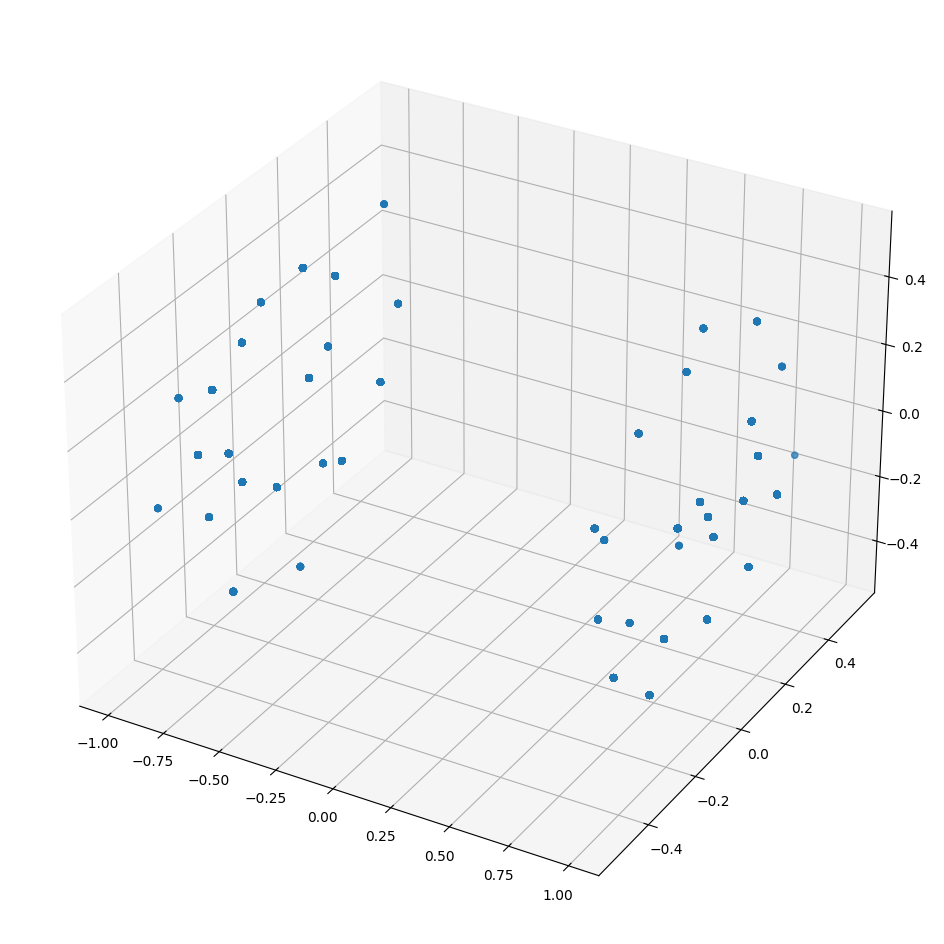

In [424]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(s3_points_3[:, 0, 1], s3_points_3[:, 0, 2], s3_points_3[:, 0, 3])

In [425]:
len(s3_points_3[:,0,1]), len(s3_points_3[:,0,2]), len(s3_points_3[:,0,3])

(10000, 10000, 10000)

In [426]:
s3_points_3[:,0,1]

array([ 0.98169874, -0.98614023,  0.98169874, ...,  0.98169874,
       -0.98614023,  0.97821005])

<Axes: ylabel='Count'>

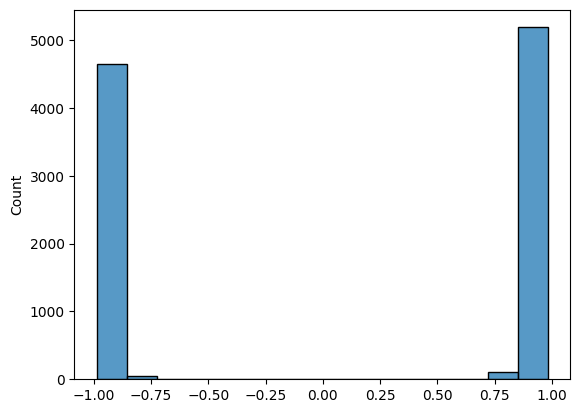

In [427]:
sns.histplot(s3_points_3[:,0,1])

In [428]:
import plotly.graph_objects as go

In [429]:
fig = go.Figure(data=[go.Scatter3d(x=s3_points_3[:, 0, 1], y=s3_points_3[:, 0, 2], z=s3_points_3[:, 0, 3],
                                   mode='markers')])

In [430]:
fig.write_html("plots/3d_plot.html")

In [431]:
s3_points_3.shape

(10000, 3, 4)

In [432]:
def all_to_all_distances(array_of_vecs):
    X = array_of_vecs
    dists_array = np.linalg.norm(X[np.newaxis, :, :] - X[:, np.newaxis, :], axis=2)

    dists_vec = np.triu(dists_array).flatten()
    pos_dists_vec = dists_vec[dists_vec > 0]

    return pos_dists_vec

### Left side
Need to be a bit more careful as the left vector can keep changing.

In [433]:
def search_step_left(previous_points, s3_previous_points, s3_sample_points, num_next_points, index, vL):
    base_tms = np.array([
        get_transfer_matrix_from_unitary(test_psi, u, index)
        .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
        .to_ndarray()
        for u in base_unitaries
    ])

    base_vectors = np.tensordot(previous_points, base_tms, [[-1,], [2,]])
    base_overlaps = np.dot(base_vectors, vL)

    #overlaps = np.abs(np.tensordot(s3_sample_points, base_overlaps, [[1,], [1,]])).flatten()
    overlaps = np.abs(np.tensordot(s3_sample_points, base_overlaps, [[1,], [1,]]))
    target_percentile = 100.0*(1.0 - min(1, num_next_points/(overlaps.size)))
    overlap_threshold = np.percentile(overlaps, target_percentile)

    all_next_points = np.tensordot(s3_sample_points, base_vectors, [[1,], [1,]])

    overlaps_filter = (overlaps > overlap_threshold)

    if s3_previous_points is None:
        assert previous_points.shape[0] == 1
        all_next_s3_points = s3_sample_points[:, np.newaxis, np.newaxis, :]
        next_s3_depth = 1
    else:
        prev_num_s3_points, prev_s3_depth, *_ = s3_previous_points.shape
        next_s3_depth = prev_s3_depth + 1

        num_s3_sample_points = s3_sample_points.shape[0]
        all_next_s3_points = np.zeros((num_s3_sample_points, prev_num_s3_points, next_s3_depth, 4))
        
        all_next_s3_points[:, :, :-1, :] = s3_previous_points[np.newaxis, ...]
        all_next_s3_points[:, :, -1, :] = s3_sample_points[:, np.newaxis, :]
        #all_next_s3_points = all_next_s3_points.reshape((prev_num_s3_points*num_s3_sample_points, prev_s3_depth + 1, 4))

    filtered_next_s3_points = np.reshape(all_next_s3_points[overlaps_filter], (-1, next_s3_depth, 4))
    filtered_next_points = np.reshape(all_next_points[overlaps_filter], (-1, 64))
    filtered_overlaps = overlaps[overlaps_filter].flatten()
        
    return (filtered_next_points, filtered_next_s3_points, filtered_overlaps)

In [360]:
index = (test_psi.L//2) -1

In [434]:
left_projected_symmetry_state.shape

(64,)

In [435]:
base_tms = np.array([
    get_transfer_matrix_from_unitary(test_psi, u, index)
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .to_ndarray()
    for u in base_unitaries
])

In [436]:
base_tms.shape

(4, 64, 64)

In [437]:
base_vectors = np.tensordot(left_projected_symmetry_state[np.newaxis, :], base_tms, [[-1,], [2,]])

In [438]:
def get_left_environment(psi, index):
    left_leg = psi.get_B(index).legs[0]
    SL = npc.diag(psi.get_SL(index), left_leg, labels = ['vL', 'vR'])
    left_environment = (
        npc.tensordot(SL, SL.conj(), (['vL',], ['vL*',]))
        .combine_legs([['vR', 'vR*'],])
        .to_ndarray()
    )

    return left_environment

In [439]:
vL = get_left_environment(test_psi, index)

In [440]:
np.linalg.norm(get_left_environment(test_psi, index) - get_left_environment(test_psi, index-1))

3.9655279782236216e-11

In [441]:
vL.shape

(64,)

In [442]:
base_overlaps = np.dot(base_vectors, vL)

In [443]:
base_overlaps.shape

(1, 4)

In [446]:
l_points_1, l_s3_points_1, l_overlaps_1 = search_step_left(
    left_projected_symmetry_state[np.newaxis, :],
    None,
    super_fib_points,
    N,
    (test_psi.L)//2 - 30 - 1,
    vL
)

In [447]:
np.max(l_overlaps_1)

0.33907274121853936

In [448]:
l_points_2, l_s3_points_2, l_overlaps_2 = search_step_left(
    l_points_1,
    l_s3_points_1,
    super_fib_points,
    N,
    (test_psi.L)//2 - 30 - 2,
    get_left_environment(test_psi, (test_psi.L)//2 - 30 - 2)
)

In [449]:
np.max(l_overlaps_2)

0.3349505914391766

In [450]:
l_points_3, l_s3_points_3, l_overlaps_3 = search_step_left(
    l_points_2,
    l_s3_points_2,
    super_fib_points,
    N,
    (test_psi.L)//2 - 30 - 3,
    get_left_environment(test_psi, (test_psi.L)//2 - 30 - 3)
)

In [451]:
np.max(l_overlaps_3)

0.33038339366322933

In [452]:
2*np.max(l_overlaps_3)*np.max(overlaps_3)

0.8739092404983074

Seems reasonable... now just need to check that this answer is correct! The asymmetry is concering...
(Maybe not actually as the symmetry operation is not symmetric.)

### Check with overlap
Get S3 points, then unitaries, then compute overlap as usual.

In [453]:
s3_points_3[np.argmax(overlaps_3)]

array([[ 0.06346218, -0.98614023, -0.13629517, -0.07016856],
       [ 0.07896558,  0.07255644,  0.01276344, -0.99415144],
       [ 0.98741941, -0.11181641, -0.09195797,  0.06359034]])

In [454]:
s3_points_3[np.argmax(overlaps_3)].shape

(3, 4)

In [455]:
base_unitaries.shape

(4, 2, 2)

In [456]:
def s3_points_to_unitary(s3_points):
    return np.tensordot(s3_points, base_unitaries, [[-1,], [0,]])

In [457]:
r_unitaries = s3_points_to_unitary(s3_points_3[np.argmax(overlaps_3)])
l_unitaries = s3_points_to_unitary(l_s3_points_3[np.argmax(l_overlaps_3)])

In [458]:
r_unitaries.shape

(3, 2, 2)

In [459]:
l_unitaries.shape

(3, 2, 2)

In [460]:
np_operators = [
    *(l_unitaries[::-1]),
    *([np_X, np_I]*30),
    *(r_unitaries)
]

In [461]:
len(np_operators)

66

In [462]:
operators = [to_npc_array(X) for X in np_operators]

In [463]:
operators[0].shape

(2, 2)

In [464]:
operators[0]

<npc.Array shape=(2, 2) labels=['p', 'p*']>

In [465]:
index = ((test_psi.L)//2) - 30 - 3

In [466]:
expectation = test_psi.expectation_value_multi_sites(operators, index)

In [467]:
np.abs(expectation)

0.8733476958546205

This is wrong...

Evaluate via transfer matrices

In [203]:
transfer_matrices = get_transfer_matrices_from_unitary_list(test_psi, np_operators, index)

In [204]:
overall_tm = reduce(multiply_transfer_matrices, transfer_matrices)

In [205]:
overall_tm

<npc.Array shape=(8, 8, 8, 8) labels=['vL', 'vL*', 'vR', 'vR*']>

In [206]:
left_environment = get_left_environment(test_psi, index)

In [207]:
left_environment

array([4.99678665e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.99678665e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.60641580e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.60641580e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.60641580e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.60641580e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.16446247e-08, 0.00000000e+00,
      

In [208]:
np_overall_tm = (
    overall_tm
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .to_ndarray()
)

In [209]:
vR

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [210]:
expectation = np.dot(np.dot(left_environment, np_overall_tm), vR)

In [211]:
expectation

(-0.0010080339199378366+0.0038792595414330615j)

In [212]:
np.abs(expectation)

0.004008090190295709

This is correct. Now perform SVD approximation.

In [213]:
symmetry_tm = (
    reduce(
        multiply_transfer_matrices,
        get_transfer_matrices_from_unitary_list(
            test_psi,
            [np_X, np_I]*30,
            (test_psi.L)//2 -30
        )
    )
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .to_ndarray()
)

In [214]:
U, S, Vh = np.linalg.svd(symmetry_tm)

In [215]:
S

array([1.99871487e+00, 5.88672656e-11, 5.88672487e-11, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
       1.41218271e-16, 1.41218271e-16, 1.41218271e-16, 1.41218271e-16,
      

In [216]:
approximate_symmetry_tm = S[0]*np.outer(U[:, 0], Vh[0])

In [217]:
np.linalg.norm(symmetry_tm - approximate_symmetry_tm)

8.325087716580306e-11

In [218]:
left_tm = (
    reduce(
        multiply_transfer_matrices,
        get_transfer_matrices_from_unitary_list(
            test_psi,
            l_unitaries[::-1],
            index
        )
    )
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .to_ndarray()
)

In [219]:
right_tm = symmetry_tm = (
    reduce(
        multiply_transfer_matrices,
        get_transfer_matrices_from_unitary_list(
            test_psi,
            r_unitaries,
            index
        )
    )
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .to_ndarray()
)

In [220]:
approximate_expectation = reduce(
    np.dot,
    [left_environment, left_tm, approximate_symmetry_tm, right_tm, vR]
)

In [221]:
np.abs(approximate_expectation)

0.004008022176878208

Correct to 4 significant figures.
Now evaluate as product of left and right terms, along with singular value.

In [222]:
left_expectation = reduce(
    np.dot,
    [left_environment, left_tm, U[:,0]]
)

In [223]:
left_expectation

(-0.000399997409236041+0.0014625292520542823j)

In [224]:
np.abs(left_expectation)

0.0015162419795369088

In [225]:
right_expectation = reduce(
    np.dot,
    [Vh[0], right_tm, vR]
)

In [226]:
right_expectation

(-1.3224395328002903+0.016773859470718237j)

In [227]:
np.abs(right_expectation)

1.3225459085697528

In [228]:
np.abs(S[0]*left_expectation*right_expectation)

0.004008022176878213

Agrees almost exactly.

In [229]:
np.max(l_overlaps_3), np.max(overlaps_3)

(0.30168928025545305, 1.322568351285101)

In [230]:
np.linalg.norm(left_projected_symmetry_state - U[:, 0])

0.0

In [231]:
np.linalg.norm(right_projected_symmetry_state - Vh[0])

0.0

Debug left side, right side seems ok.

In [232]:
l_arg_1 = np.argmax(l_overlaps_1)

In [233]:
l_arg_1

7

In [234]:
l_point_1 = l_points_1[l_arg_1]

In [235]:
l_point_1.shape

(64,)

In [236]:
l_s3_point_1 = l_s3_points_1[l_arg_1, 0]

In [237]:
l_s3_points_1.shape

(502, 1, 4)

In [238]:
l_s3_point_1

array([ 0.07896558,  0.07255644,  0.01276344, -0.99415144])

In [239]:
np.max(l_overlaps_1)

0.13863469139805149

In [240]:
np.abs(np.dot(l_point_1, vL))

0.13863469139805146

In [241]:
np.abs(np.dot(vL, l_point_1))

0.13863469139805146

In [242]:
l_unitary_1 = s3_points_to_unitary(l_s3_point_1)

In [243]:
l_tm_1 = (
    get_transfer_matrix_from_unitary(test_psi, l_unitary_1, (test_psi.L)//2 - 30 - 1)
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .to_ndarray()
)

In [244]:
l_tm_1

array([[ 4.96927763e-02+4.46015339e-02j, -6.17616608e-03+4.80019523e-01j,
        -9.21069036e-05+6.96919634e-03j, ...,
        -2.05296990e-19+6.84121754e-19j,  4.87034389e-33-1.37794227e-31j,
         8.47991761e-33-5.62321666e-32j],
       [ 6.21260874e-03-4.79986421e-01j, -4.96791229e-02-4.56595294e-02j,
         4.21335045e-04+3.41567903e-04j, ...,
         1.38462010e-19-3.67287340e-18j, -8.45854523e-33+2.84093332e-32j,
        -6.21148835e-33+1.20314227e-31j],
       [ 5.16845847e-03-4.02188188e-01j,  2.42796756e-02+2.18160857e-02j,
         2.34734007e-02+2.30299199e-02j, ...,
        -4.13380741e-18+1.08529889e-16j,  8.98632071e-20-3.12292348e-18j,
         2.02700974e-19-1.18709498e-18j],
       ...,
       [ 1.42209634e-15-2.24896389e-13j,  2.48874320e-14-9.50529439e-14j,
        -1.44207875e-14+5.51316653e-14j, ...,
        -1.80225278e-03+4.87161551e-03j, -7.86825976e-05-5.90125189e-05j,
        -6.67302834e-05+1.58678419e-03j],
       [ 2.05749722e-28+5.56849196e-26j, -5.

In [245]:
np.abs(np.dot(vL, np.dot(l_tm_1, U[:, 0])))

0.3390727412185396

In [246]:
U[:, 0].shape

(64,)

In [247]:
np.linalg.norm(np.dot(l_tm_1, U[:, 0]) - l_point_1)

1.2899211412551288

In [248]:
np.linalg.norm(left_projected_symmetry_state-U[:,0])

0.0

In [249]:
np.abs(reduce(np.dot, [vL, l_tm_1, U[:,0]]))

0.3390727412185394

Something fishy, step through...

In [250]:
previous_points = left_projected_symmetry_state[np.newaxis, :]
s3_previous_points = None
s3_sample_points = super_fib_points
num_next_points = N
index = (test_psi.L)//2 - 30 - 1

In [251]:
base_tms = np.array([
    get_transfer_matrix_from_unitary(test_psi, u, index)
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .to_ndarray()
    for u in base_unitaries
])

In [252]:
base_tms.shape

(4, 64, 64)

In [253]:
np.linalg.norm(np.tensordot(l_s3_point_1, base_tms, [[-1], [0]]) - l_tm_1)

5.742041854060771e-16

In [254]:
base_vectors = np.tensordot(previous_points, base_tms, [[-1,], [2,]])

In [255]:
base_vectors.shape

(1, 4, 64)

In [256]:
np.linalg.norm(l_point_1 - np.dot(l_s3_point_1, base_vectors[0]))

1.2899211412551288

In [257]:
base_overlaps = np.dot(base_vectors, vL)

In [258]:
base_overlaps.shape

(1, 4)

In [259]:
overlaps = np.abs(np.tensordot(s3_sample_points, base_overlaps, [[1,], [1,]]))

In [260]:
overlaps.shape

(503, 1)

In [261]:
overlaps[l_arg_1, 0]

0.33907274121853953

In [262]:
all_next_points = np.tensordot(s3_sample_points, base_vectors, [[1,], [1,]])

In [263]:
all_next_points.shape

(503, 1, 64)

In [264]:
np.linalg.norm(all_next_points[l_arg_1, 0] - l_point_1)

1.2899211412551288

In [265]:
np.linalg.norm(all_next_points[l_arg_1, 0] - np.dot(l_tm_1, U[:,0]))

2.956145590638561e-16

In [266]:
target_percentile = 100.0*(1.0 - min(1, num_next_points/(overlaps.size)))
overlap_threshold = np.percentile(overlaps, target_percentile)

overlaps_filter = (overlaps > overlap_threshold)

In [267]:
overlaps_filter.shape

(503, 1)

In [268]:
overlaps_filter.shape

(503, 1)

In [269]:
overlaps_filter.sum()

502

In [270]:
overlap_threshold

0.0004871987699695134

In [271]:
np.min(overlaps)

0.0004871987699695134

In [272]:
all_next_points.shape

(503, 1, 64)

In [273]:
all_next_points[overlaps_filter].shape

(502, 64)

In [274]:
all_next_s3_points = s3_sample_points[:, np.newaxis, np.newaxis, :]
next_s3_depth = 1

In [275]:
filtered_next_s3_points = np.reshape(all_next_s3_points[overlaps_filter], (-1, next_s3_depth, 4))
filtered_next_points = np.reshape(all_next_points[overlaps_filter], (-1, 64))
filtered_overlaps = overlaps[overlaps_filter].flatten()

In [276]:
l_points_1.shape

(502, 64)

In [277]:
filtered_next_points.shape

(502, 64)

In [278]:
np.linalg.norm(l_points_1 - filtered_next_points)

25.74014075292017

In [279]:
np.linalg.norm(l_points_1 - filtered_next_points)

25.74014075292017

In [280]:
all_next_points.shape

(503, 1, 64)

In [281]:
np.linalg.norm(all_next_points[overlaps_filter] - l_points_1)

25.74014075292017

In [282]:
np.linalg.norm(all_next_points[overlaps_filter] - filtered_next_points)

0.0

In [283]:
np.nonzero(overlaps == overlap_threshold)

(array([33]), array([0]))

In [284]:
overlaps[0]

array([0.15670499])

In [285]:
overlaps[33]

array([0.0004872])

In [286]:
overlaps[33,0]

0.0004871987699695134

Ok, seems alright at step 1. Try step 2:

In [378]:
np.max(l_overlaps_2)

0.3053306295558697

In [379]:
l_arg_2 = np.argmax(l_overlaps_2)

In [381]:
l_s3_points_2.shape

(10000, 2, 4)

In [382]:
l_s3_point_2_1, l_s3_point_2_2 = l_s3_points_2[l_arg_2]

In [383]:
l_point_2 = l_points_2[l_arg_2]

In [392]:
np.abs(np.dot(l_point_2, vL))

0.3053306295550417

In [385]:
l_unitary_2_1 = s3_points_to_unitary(l_s3_point_2_1)
l_unitary_2_2 = s3_points_to_unitary(l_s3_point_2_2)

In [386]:
l_tm_2_1 = (
    get_transfer_matrix_from_unitary(test_psi, l_unitary_2_1, (test_psi.L)//2 - 30 - 1)
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .to_ndarray()
)

l_tm_2_2 = (
    get_transfer_matrix_from_unitary(test_psi, l_unitary_2_2, (test_psi.L)//2 - 30 - 2)
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .to_ndarray()
)

In [387]:
vL = get_left_environment(test_psi, (test_psi.L)//2 - 30 - 2)

In [390]:
help(reduce)

Help on built-in function reduce in module _functools:

reduce(...)
    reduce(function, iterable[, initial]) -> value
    
    Apply a function of two arguments cumulatively to the items of a sequence
    or iterable, from left to right, so as to reduce the iterable to a single
    value.  For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates
    ((((1+2)+3)+4)+5).  If initial is present, it is placed before the items
    of the iterable in the calculation, and serves as a default when the
    iterable is empty.



In [391]:
np.abs(reduce(np.dot, [vL, l_tm_2_2, l_tm_2_1, U[:,0]]))

0.0019424581974042583

In [393]:
previous_points =  l_points_1
s3_previous_points = l_s3_points_1
s3_sample_points = super_fib_points
num_next_points = N
index = (test_psi.L)//2 - 30 - 2
vL = get_left_environment(test_psi, (test_psi.L)//2 - 30 - 2)

In [394]:
previous_points.shape

(502, 64)

In [395]:
base_tms = np.array([
    get_transfer_matrix_from_unitary(test_psi, u, index)
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .to_ndarray()
    for u in base_unitaries
])

In [396]:
base_tms.shape

(4, 64, 64)

In [397]:
base_vectors = np.tensordot(previous_points, base_tms, [[-1,], [2,]])

In [398]:
base_vectors.shape

(502, 4, 64)

In [399]:
base_overlaps = np.dot(base_vectors, vL)

In [400]:
base_overlaps.shape

(502, 4)

In [401]:
overlaps = np.abs(np.tensordot(s3_sample_points, base_overlaps, [[1,], [1,]]))

In [402]:
overlaps.shape

(503, 502)

In [403]:
np.max(overlaps)

0.1474604969971217

In [404]:
target_percentile = 100.0*(1.0 - min(1, num_next_points/(overlaps.size)))
overlap_threshold = np.percentile(overlaps, target_percentile)

In [405]:
overlap_threshold

0.10058552550365561

In [406]:
np.max(l_overlaps_2)

0.3053306295558697

In [407]:
all_next_points = np.tensordot(s3_sample_points, base_vectors, [[1,], [1,]])

overlaps_filter = (overlaps > overlap_threshold)

In [408]:
all_next_points.shape

(503, 502, 64)

In [409]:
overlaps_filter.shape

(503, 502)

In [410]:
overlaps_filter.sum()

10000

In [287]:
def search_step_left(previous_points, s3_previous_points, s3_sample_points, num_next_points, index, vL):
    base_tms = np.array([
        get_transfer_matrix_from_unitary(test_psi, u, index)
        .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
        .to_ndarray()
        for u in base_unitaries
    ])

    base_vectors = np.tensordot(previous_points, base_tms, [[-1,], [2,]])
    base_overlaps = np.dot(base_vectors, vL)

    #overlaps = np.abs(np.tensordot(s3_sample_points, base_overlaps, [[1,], [1,]])).flatten()
    overlaps = np.abs(np.tensordot(s3_sample_points, base_overlaps, [[1,], [1,]]))
    target_percentile = 100.0*(1.0 - min(1, num_next_points/(overlaps.size)))
    overlap_threshold = np.percentile(overlaps, target_percentile)

    all_next_points = np.tensordot(s3_sample_points, base_vectors, [[1,], [1,]])

    overlaps_filter = (overlaps > overlap_threshold)

    if s3_previous_points is None:
        assert previous_points.shape[0] == 1
        all_next_s3_points = s3_sample_points[:, np.newaxis, np.newaxis, :]
        next_s3_depth = 1
    else:
        prev_num_s3_points, prev_s3_depth, *_ = s3_previous_points.shape
        next_s3_depth = prev_s3_depth + 1

        num_s3_sample_points = s3_sample_points.shape[0]
        all_next_s3_points = np.zeros((num_s3_sample_points, prev_num_s3_points, next_s3_depth, 4))
        
        all_next_s3_points[:, :, :-1, :] = s3_previous_points[np.newaxis, ...]
        all_next_s3_points[:, :, -1, :] = s3_sample_points[:, np.newaxis, :]
        #all_next_s3_points = all_next_s3_points.reshape((prev_num_s3_points*num_s3_sample_points, prev_s3_depth + 1, 4))

    filtered_next_s3_points = np.reshape(all_next_s3_points[overlaps_filter], (-1, next_s3_depth, 4))
    filtered_next_points = np.reshape(all_next_points[overlaps_filter], (-1, 64))
    filtered_overlaps = overlaps[overlaps_filter].flatten()
        
    return (filtered_next_points, filtered_next_s3_points, filtered_overlaps)

In [ ]:
l_points_2, l_s3_points_2, l_overlaps_2 = search_step_left(
    l_points_1,
    l_s3_points_1,
    super_fib_points,
    N,
    index-1,
    get_left_environment(test_psi, index-1)
)

All agrees, so move on to next step.

In [288]:
r_arg_2 = np.argmax(overlap_2)

In [289]:
r_arg_2

645

In [290]:
r_point_2 = points_2[r_arg_2]

In [291]:
r_point_2

array([ 6.55164422e-01+6.59906798e-02j, -7.63329095e-04-6.71785343e-03j,
        3.56680075e-03+2.10711351e-04j, -1.94540927e-03-7.36736649e-05j,
        1.36592014e-04-1.72160535e-03j,  1.63216362e-05-3.18971896e-04j,
        1.54139292e-05-6.50938166e-06j,  1.96701704e-07-4.38575213e-06j,
        3.03929670e-03+6.78221523e-03j,  6.83188779e-01-4.36995105e-02j,
       -6.91171735e-05-1.07435763e-03j,  1.10637577e-04+1.39670050e-03j,
        1.93202333e-03+1.91955850e-04j,  1.37440785e-03+6.18061616e-05j,
        1.38037766e-07-2.53521694e-06j,  1.42331467e-05-8.79625108e-06j,
        3.56212925e-03-7.51415678e-05j,  1.48207526e-04+1.75905506e-03j,
       -1.05740509e-04+5.58127486e-06j,  1.85340437e-04-2.29606238e-05j,
       -5.04338254e-07-2.19132274e-06j, -1.83845022e-07+1.86765432e-06j,
       -3.37490243e-07-2.43297719e-08j, -1.19483358e-09-3.90875686e-08j,
       -1.96439058e-03+3.74958039e-05j, -3.92652250e-06-9.76253972e-05j,
        1.86518065e-04-7.44016829e-06j,  1.13306099

In [292]:
s3_points_max_2 = s3_points_2[r_arg_2]

In [293]:
s3_points_max_2.shape

(2, 4)

In [294]:
s3_points_max_2

array([[ 0.06346218, -0.98614023, -0.13629517, -0.07016856],
       [ 0.07896558,  0.07255644,  0.01276344, -0.99415144]])

In [295]:
np.max(overlap_2)

1.3385384571321608

In [296]:
np.abs(np.dot(r_point_2, vR))

1.3385384571321608

In [297]:
r_unitary_2_1 = s3_points_to_unitary(s3_points_max_2[0])
r_unitary_2_2 = s3_points_to_unitary(s3_points_max_2[1])

In [298]:
r_tm_2_1 = (
    get_transfer_matrix_from_unitary(test_psi, r_unitary_2_1, (test_psi.L)//2 + 30)
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .to_ndarray()
)

r_tm_2_2 = (
    get_transfer_matrix_from_unitary(test_psi, r_unitary_2_2, (test_psi.L)//2 + 31)
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .to_ndarray()
)

In [299]:
np.abs(reduce(np.dot, [Vh[0], r_tm_2_1, r_tm_2_2, vR]))

1.3385384571321608

In [300]:
np.linalg.norm(reduce(np.dot, [Vh[0], r_tm_2_1, r_tm_2_2]) - r_point_2)

2.0228825977488903e-17

In [301]:
r_point_2.shape

(64,)

In [302]:
reduce(np.dot, [Vh[0], r_tm_2_1, r_tm_2_2]).shape

(64,)

All good so far.

Step through I guess...

In [303]:
previous_points = points_1
s3_previous_points = s3_points_1
s3_sample_points = super_fib_points
num_next_points = N
index = (test_psi.L)//2 + 30 + 1

In [304]:
base_tms = np.array([
    get_transfer_matrix_from_unitary(test_psi, u, index)
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .to_ndarray()
    for u in base_unitaries
])

In [305]:
base_vectors = np.matmul(previous_points, base_tms)
base_overlaps = np.dot(base_vectors, vR)

In [306]:
base_vectors.shape

(4, 502, 64)

In [307]:
base_overlaps.shape

(4, 502)

In [308]:
np.tensordot(s3_sample_points, base_overlaps, [[1,], [0,]]).shape

(503, 502)

In [309]:
overlaps = np.abs(np.tensordot(s3_sample_points, base_overlaps, [[1,], [0,]])).flatten()

In [310]:
np.abs(np.tensordot(s3_sample_points, base_overlaps, [[1,], [0,]])).shape

(503, 502)

In [311]:
overlaps.shape

(252506,)

In [312]:
target_percentile = 100.0*(1.0 - min(1, num_next_points/len(overlaps)))
overlap_threshold = np.percentile(overlaps, target_percentile)

In [313]:
target_percentile

96.0396980665806

In [314]:
overlap_threshold

0.7985486980277029

In [315]:
np.max(overlaps)

1.3385384571321608

In [316]:
all_next_points = np.tensordot(s3_sample_points, base_vectors, [[1,], [0,]])

In [317]:
all_next_points.shape

(503, 502, 64)

In [318]:
filtered_next_points = np.reshape(all_next_points, (-1, 64))[overlaps > overlap_threshold]

In [319]:
filtered_next_points.shape

(10000, 64)

In [320]:
s3_previous_points is None

False

In [321]:
prev_num_s3_points, prev_s3_depth, *_ = s3_previous_points.shape
num_s3_sample_points = s3_sample_points.shape[0]
all_next_s3_points = np.zeros((prev_num_s3_points, num_s3_sample_points, prev_s3_depth + 1, 4))

all_next_s3_points[:, :, :-1, :] = s3_previous_points[:, np.newaxis, :, :]
all_next_s3_points[:, :, -1, :] = s3_sample_points[np.newaxis, :, :]
all_next_s3_points = all_next_s3_points.reshape((prev_num_s3_points*num_s3_sample_points, prev_s3_depth + 1, 4))

In [322]:
filtered_next_s3_points = all_next_s3_points[overlaps > overlap_threshold, ...]
filtered_overlaps = overlaps[overlaps > overlap_threshold]

In [323]:
filtered_overlaps[0]

0.8088986832985713

Step through for first points

In [324]:
overlaps.shape

(252506,)

In [325]:
overlaps[0]

0.022669870879346014

In [326]:
next_point = all_next_points[0, 0]
previous_point = points_1[0]

In [327]:
s3_previous_point = s3_previous_points[0, 0]

In [328]:
s3_next_point = s3_sample_points[0]

In [329]:
all_next_s3_points.shape

(252506, 2, 4)

In [330]:
np.linalg.norm(all_next_s3_points[0,0] - s3_previous_point)

0.0

In [331]:
np.linalg.norm(all_next_s3_points[0,1] - s3_next_point)

0.0

In [332]:
previous_unitary = (
    get_transfer_matrix_from_unitary(
        test_psi,
        s3_points_to_unitary(s3_previous_point),
        (test_psi.L)//2 + 30
    )
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .to_ndarray()
)

next_unitary = (
    get_transfer_matrix_from_unitary(
        test_psi,
        s3_points_to_unitary(s3_next_point),
        (test_psi.L)//2 + 31
    )
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .to_ndarray()
)

In [333]:
np.linalg.norm(np.dot(Vh[0], previous_unitary) - previous_point)

9.573289061756698e-17

In [334]:
np.linalg.norm(np.dot(previous_point, next_unitary) - next_point)

4.58098745451507e-17

In [335]:
np.linalg.norm(reduce(np.dot, [Vh[0], previous_unitary, next_unitary]) - next_point)

9.015546438799351e-17

In [336]:
np.abs(reduce(np.dot, [Vh[0], previous_unitary, next_unitary, vR]))

0.02266987087934599

In [337]:
overlaps[0]

0.022669870879346014

Okay, try another point

In [338]:
overlaps.shape

(252506,)

In [339]:
overlaps[0]

0.022669870879346014

In [340]:
all_next_points.shape

(503, 502, 64)

In [341]:
previous_points.shape

(502, 64)

In [342]:
s3_sample_points.shape

(503, 4)

In [343]:
previous_point_index = 10
s3_sample_point_index = 20

In [344]:
next_point = all_next_points[s3_sample_point_index, previous_point_index]
previous_point = points_1[previous_point_index]

In [345]:
s3_previous_points.shape

(502, 1, 4)

In [346]:
s3_previous_point = s3_previous_points[previous_point_index, 0]

In [347]:
s3_next_point = s3_sample_points[s3_sample_point_index]

In [348]:
all_next_s3_points.shape

(252506, 2, 4)

In [349]:
num_s3_sample_points

503

In [350]:
num_previous_points = previous_points.shape[0]
num_previous_points

502

In [351]:
np.linalg.norm(all_next_s3_points[previous_point_index*num_s3_sample_points + s3_sample_point_index,0] - s3_previous_point)

0.0

In [352]:
np.linalg.norm(all_next_s3_points[previous_point_index*num_s3_sample_points + s3_sample_point_index,1] - s3_next_point)

0.0

In [353]:
previous_unitary = (
    get_transfer_matrix_from_unitary(
        test_psi,
        s3_points_to_unitary(s3_previous_point),
        (test_psi.L)//2 + 30
    )
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .to_ndarray()
)

next_unitary = (
    get_transfer_matrix_from_unitary(
        test_psi,
        s3_points_to_unitary(s3_next_point),
        (test_psi.L)//2 + 31
    )
    .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
    .to_ndarray()
)

In [354]:
np.linalg.norm(np.dot(Vh[0], previous_unitary) - previous_point)

1.7229811868533296e-16

In [355]:
np.linalg.norm(np.dot(previous_point, next_unitary) - next_point)

1.4322266331654753e-16

In [356]:
np.linalg.norm(reduce(np.dot, [Vh[0], previous_unitary, next_unitary]) - next_point)

1.1660969443300767e-16

In [357]:
np.abs(reduce(np.dot, [Vh[0], previous_unitary, next_unitary, vR]))

0.15367963328059475

In [358]:
overlaps[previous_point_index*num_s3_sample_points + s3_sample_point_index]

0.27602744285883185

In [359]:
overlaps[previous_point_index + s3_sample_point_index*num_previous_points]

0.15367963328059484

Disagreement! Need to track this down...

# To-do
* Compute all-to-all distances and statistics more carefully. Could avoid gigantic arrays with blocking of arrays, then bucket the results. Could use an array for the buckets.
* The big freedom is choosing the $S^3$ points to sample over, and then which of the resulting points to keep. Currently keeping the top candidates. Could also keep a certain portion of the top candidates, then sample the remainders also. Could do this uniformly, or sample uniformly with respect to the deciles. E.g. take an equal number of points from 0-.1, .1-.2 etc. Want to get a good "spread" of candidates.
* Again, the optimization step is crying out for an OOP API. That raises the question of how to integrate such an object with other optimization based objects, and even the possibility of combining/mixing strategies.
* I'm getting different results sometime, but I don't think there's anything inherently stochastic going on. There could be a leaked global variable creeping into the function that's getting overwritten...?